## Importng the packages and modules required in the project

In [328]:
import pandas as pd
import numpy as np
import csv
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.learning_curve import learning_curve
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

## reading the data

In [329]:
adv=pd.read_csv('fakerealnews.csv')

In [330]:
adv

,label,news
0,FAKE,You Can Smell Hillary’s Fear
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matters
5,FAKE,"Tehran, USA"
6,FAKE,Girl Horrified At What She Watches Boyfriend D...
7,REAL,‘Britain’s Schindler’ Dies at 106
8,REAL,Fact check: Trump and Clinton at the 'commande...
9,REAL,Iran reportedly makes new push for uranium con...


## value counts- Returns object containing counts of unique values.

In [331]:
adv.news.value_counts()

OnPolitics | 's politics blog                                                                                        3
Michael Moore Owes Me $4.99                                                                                          3
Meteor, space junk, rocket? Mysterious flash hits Siberia                                                            2
What is going on with WikiLeaks?                                                                                     2
Loretta Lynch becomes first African-American woman AG.                                                               2
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                                          2
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                   2
Obamacare Enrollees Anxiously Await Supreme Court Decision That Threatens Their Coverage                             2
The Israeli Trumpess                            

In [332]:
adv.label.value_counts()

FAKE    1206
REAL    1147
Name: label, dtype: int64

## Aggregate statistics

In [333]:
adv.describe()

,label,news
count,2353,2353
unique,2,2338
top,FAKE,OnPolitics | 's politics blog
freq,1206,3


In [334]:
adv.groupby('label').describe()

news
label                                      
FAKE  count                            1206
      unique                           1196
      top       Michael Moore Owes Me $4.99
      freq                                3
REAL  count                            1147
      unique                           1142
      top     OnPolitics | 's politics blog
      freq                                3

## Removing Null values- Cleaning the data

In [335]:
adv[adv.news.notnull()]
adv[adv.label.notnull()]

,label,news
0,FAKE,You Can Smell Hillary’s Fear
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matters
5,FAKE,"Tehran, USA"
6,FAKE,Girl Horrified At What She Watches Boyfriend D...
7,REAL,‘Britain’s Schindler’ Dies at 106
8,REAL,Fact check: Trump and Clinton at the 'commande...
9,REAL,Iran reportedly makes new push for uranium con...


In [336]:
adv=adv[pd.notnull(adv['news'])]
adv=adv[pd.notnull(adv['label'])]

In [337]:
adv.isnull()

,label,news
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## Calculating the length of news

In [338]:
adv['length']=adv['news'].map(lambda text: len(text))
adv.head(30)

,label,news,length
0,FAKE,You Can Smell Hillary’s Fear,28
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,85
2,REAL,Kerry to go to Paris in gesture of sympathy,43
3,FAKE,Bernie supporters on Twitter erupt in anger ag...,84
4,REAL,The Battle of New York: Why This Primary Matters,48
5,FAKE,"Tehran, USA",11
6,FAKE,Girl Horrified At What She Watches Boyfriend D...,73
7,REAL,‘Britain’s Schindler’ Dies at 106,33
8,REAL,Fact check: Trump and Clinton at the 'commande...,63
9,REAL,Iran reportedly makes new push for uranium con...,71


## Plotting the graph according 

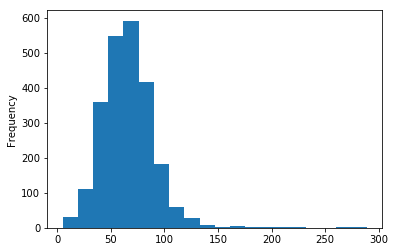

In [339]:
adv.length.plot( bins=20, kind='hist')

## Plotting the histogram according to the length of both the labels

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B68944DA0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000027B68A00860>], dtype=object)

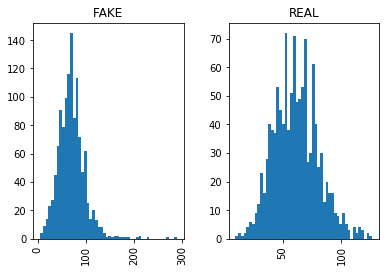

In [340]:
adv.hist(column='length', by='label', bins=50)

## Data Preprocessing

In [341]:
def tokenize(news):
    news2 = 'news -' + str(news)  # convert bytes into proper unicode
    return TextBlob(news).words

In [342]:
adv.news.head().apply(tokenize)

0                   [You, Can, Smell, Hillary’s, Fear]
1    [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2    [Kerry, to, go, to, Paris, in, gesture, of, sy...
3    [Bernie, supporters, on, Twitter, erupt, in, a...
4    [The, Battle, of, New, York, Why, This, Primar...
Name: news, dtype: object

In [343]:
def lemmatize(news):
    news2 = 'news -' + str(news).lower()
    words = TextBlob(news).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

adv.news.head().apply(lemmatize)

0                   [You, Can, Smell, Hillary’s, Fear]
1    [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2    [Kerry, to, go, to, Paris, in, gesture, of, sy...
3    [Bernie, supporter, on, Twitter, erupt, in, an...
4    [The, Battle, of, New, York, Why, This, Primar...
Name: news, dtype: object

In [344]:
TextBlob("Strong Solar Storm, Tech Risks Today").tags 

[('Strong', 'JJ'),
 ('Solar', 'NNP'),
 ('Storm', 'NNP'),
 ('Tech', 'NNP'),
 ('Risks', 'NNP'),
 ('Today', 'NNP')]

In [345]:
TextBlob("What's in that Iran bill that Obama doesn't like?").tags

[('What', 'WP'),
 ("'s", 'VBZ'),
 ('in', 'IN'),
 ('that', 'DT'),
 ('Iran', 'NNP'),
 ('bill', 'NN'),
 ('that', 'WDT'),
 ('Obama', 'NNP'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('like', 'VB')]

## Data to Vectors- fitting and transforming using Count Vectorizer 

In [346]:
bow_transformer=CountVectorizer(analyzer=lemmatize).fit(adv['news'])
len(bow_transformer.vocabulary_)

7934

In [347]:
news4=adv['news'][160]
news4

'‘Super PAC’ Gets Early Start on Pushing for a 2016 Clinton Campaign'

In [348]:
bow4 = bow_transformer.transform([news4])
bow4

<1x7934 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [349]:
bow4.shape

(1, 7934)

#### //getting feature names

In [350]:
bow_transformer.get_feature_names()[665]

'Based'

In [351]:
news_bow = bow_transformer.transform(adv['news'])

'sparsity: %.2f%%' % (100.0 * news_bow.nnz / (news_bow.shape[0] * news_bow.shape[1]))

'sparsity: 0.13%'

In [352]:
'sparse matrix shape:', news_bow.shape


('sparse matrix shape:', (2353, 7934))

In [353]:
'number of non-zeros:', news_bow.nnz

('number of non-zeros:', 24537)

## Data to Vectors- fitting and transforming TFIDF- term frequency- inverse doc frequency and getting sparse matrix

In [354]:
tfidf_transformer = TfidfTransformer().fit(news_bow)
tfidf4 = tfidf_transformer.transform(bow4)
tfidf4

<1x7934 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [355]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]

6.6844297461403865

In [356]:
news_tfidf = tfidf_transformer.transform(news_bow)
news_tfidf.shape

(2353, 7934)

## Applying Multinomial on the whole training set and predicting accuracy

In [357]:
%time spam_detector = MultinomialNB().fit(news_tfidf, adv['label'])

Wall time: 10.1 ms


In [358]:
spam_detector=MultinomialNB().fit(news_tfidf, adv['label'])
spam_detector

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [359]:
'predicted:', spam_detector.predict(tfidf4)[0]

('predicted:', 'REAL')

In [360]:
'expected:', adv.label[55]

('expected:', 'REAL')

In [361]:
all_predictions = spam_detector.predict(news_tfidf)
all_predictions

array(['FAKE', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], 
      dtype='<U4')

In [362]:
'accuracy', accuracy_score(adv['label'], all_predictions)


('accuracy', 0.94050148746281348)

In [363]:
'confusion matrix\n', confusion_matrix(adv['label'], all_predictions)


('confusion matrix\n', array([[1126,   80],
        [  60, 1087]]))

In [364]:
'(row=expected, col=predicted)'

'(row=expected, col=predicted)'

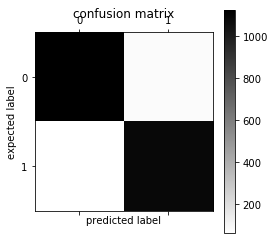

In [365]:

plt.matshow(confusion_matrix(adv['label'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [366]:
print (classification_report(adv['label'], all_predictions))

             precision    recall  f1-score   support

       FAKE       0.95      0.93      0.94      1206
       REAL       0.93      0.95      0.94      1147

avg / total       0.94      0.94      0.94      2353



## For Logistic Regression

In [367]:
%time spam_detector = LogisticRegression().fit(news_tfidf, adv['label'])

Wall time: 11 ms


In [368]:
spam_detector=LogisticRegression().fit(news_tfidf, adv['label'])
spam_detector

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [369]:
print('predicted:', spam_detector.predict(tfidf4)[0])
print('expected:', adv.label[6])

predicted: REAL
expected: FAKE


In [370]:
all_predictions = spam_detector.predict(news_tfidf)
all_predictions

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'FAKE', 'REAL'], dtype=object)

In [371]:
print('accuracy', accuracy_score(adv['label'], all_predictions))
print('confusion matrix\n', confusion_matrix(adv['label'], all_predictions))
print('(row=expected, col=predicted)')


accuracy 0.946451338717
confusion matrix
 [[1168   38]
 [  88 1059]]
(row=expected, col=predicted)


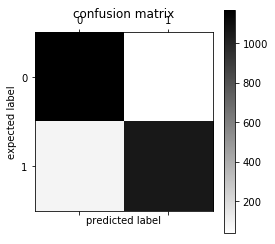

In [372]:

plt.matshow(confusion_matrix(adv['label'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [373]:
print (classification_report(adv['label'], all_predictions))

             precision    recall  f1-score   support

       FAKE       0.93      0.97      0.95      1206
       REAL       0.97      0.92      0.94      1147

avg / total       0.95      0.95      0.95      2353



## Calculating how much data we are training and testing

In [374]:
msg_train, msg_test, label_train, label_test = train_test_split(adv['news'], adv['label'], test_size=0.2)

len(msg_train), len(msg_test), len(msg_train) + len(msg_test)

(1882, 471, 2353)

#### Resulted in 5% of testing data and rest is the training data

## PIPELINE- to combine techniques


In [375]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='char')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),# train on TF-IDF vectors w/ Naive Bayes classifie
])

In [376]:
import _pickle as cPickle

## Cross Validation Scores for Logistic Regression

In [377]:
scores = cross_val_score(pipeline,  # convert news into models
                         msg_train,  # training data
                         label_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

In [378]:
scores

array([ 0.61904762,  0.7037037 ,  0.65957447,  0.66489362,  0.59574468,
        0.62234043,  0.65957447,  0.69680851,  0.65957447,  0.64893617])

In [379]:
scores.mean(), scores.std()

(0.65301981312619595, 0.031856924251973839)

## Cross Validation scores for Naive Bayes

In [380]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='char')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),# train on TF-IDF vectors w/ Naive Bayes classifie
])

In [381]:
scores = cross_val_score(pipeline,  # convert news into models
                         msg_train,  # training data
                         label_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)


[ 0.59259259  0.66666667  0.64893617  0.64893617  0.62765957  0.64361702
  0.65957447  0.70212766  0.64893617  0.60638298]


In [382]:
scores.mean(), scores.std()

(0.64454294720252159, 0.029206564432195065)

In [383]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Data")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Wall time: 4.66 s


<module 'matplotlib.pyplot' from 'C:\\Users\\navkiran\\anaconda3 4.3.1\\lib\\site-packages\\matplotlib\\pyplot.py'>

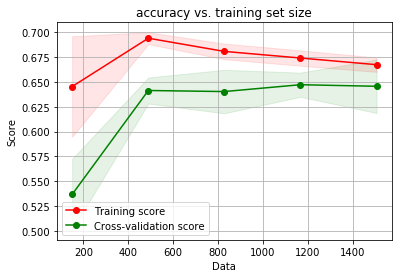

In [384]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", msg_train, label_train, cv=5)

In [385]:
from sklearn.grid_search import GridSearchCV

## GridSearch for SVM

In [386]:
pipeline_svm = Pipeline([
    ('bow', CountVectorizer(analyzer='char')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC()),  # <== change here
])

# pipeline parameters to automatically explore and tune
param_svm = [
  {'classifier__C': [1], 'classifier__kernel': ['linear']},
  {'classifier__C': [1], 'classifier__gamma': [0.001, 0.0001], 'classifier__kernel': ['rbf']},
]

grid_svm = GridSearchCV(
    pipeline_svm,  # pipeline from above
    param_grid=param_svm,  # parameters to tune via cross validation
    refit=True,  # fit using all data, on the best detected classifier
    n_jobs=-1,  # number of cores to use for parallelization; -1 for "all cores"
    scoring='accuracy',  # what score are we optimizing?
    cv=StratifiedKFold(label_train, n_folds=5),  # what type of cross validation to use
)

## SVM time ad Scores

In [387]:
%time svm_detector = grid_svm.fit(msg_train, label_train)
svm_detector.grid_scores_

Wall time: 6.32 s


[mean: 0.65994, std: 0.02824, params: {'classifier__C': 1, 'classifier__kernel': 'linear'},
 mean: 0.51541, std: 0.00067, params: {'classifier__C': 1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'},
 mean: 0.51541, std: 0.00067, params: {'classifier__C': 1, 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}]

In [388]:
print(confusion_matrix(label_test, svm_detector.predict(msg_test)))
print(classification_report(label_test, svm_detector.predict(msg_test)))

[[178  58]
 [112 123]]
             precision    recall  f1-score   support

       FAKE       0.61      0.75      0.68       236
       REAL       0.68      0.52      0.59       235

avg / total       0.65      0.64      0.63       471



In [389]:
svm_detector.predict(["Donald Trump just trolled Rosie O'Donnell. Not good"])[0]

'REAL'

In [390]:
svm_detector.predict(["Kushner family won't attend China investor pitch after criticism."])[0]

'REAL'

In [391]:
svm_detector.predict(["US prosecuter told to push for more harsher punishments"])[0]

'REAL'

In [392]:
clf=svm.SVC(kernel='linear', C=1.0,gamma=1)


In [393]:
clf.fit(X_test_dtm,y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [394]:
clf.score(X_test_dtm,y_test)

0.99830220713073003

In [395]:
predicted=clf.predict(X_test_dtm)

In [396]:
predicted

array(['FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL',
       'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL',
       'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL',
       'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL',
       'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL',
       'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE',
       'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL',
       'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL',
       'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL',
       'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL',
      

## Count Vectorizer and TRAINING AND TESTING DATA

In [397]:
vect=CountVectorizer()

In [398]:
new_df1=adv[['news']]
new_df2=adv[['label']]

In [399]:
train_data=new_df1.iloc[1:500,:]
test_data=new_df2.iloc[500:1,:]
train_label=new_df1.iloc[1:500,:]
test_label=new_df2.iloc[500:1,:]
train_vectors=cv.fit_transform(train_data)
test_vectors=cv.fit_transform(test_data)

In [400]:
cv.get_feature_names()

['label']

In [401]:
train_vectors.toarray()

array([[1]], dtype=int64)

In [402]:
test_vectors.toarray()

array([[1]], dtype=int64)

In [403]:
X=adv.news
y=adv.label

In [404]:
print(X.shape)
print(y.shape)

(2353,)
(2353,)


In [405]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=4)

In [406]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1764,)
(589,)
(1764,)
(589,)


In [407]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [408]:
X_train_dtm=vect.fit_transform(X_train)

In [409]:
X_train_dtm

<1764x5028 sparse matrix of type '<class 'numpy.int64'>'
	with 17866 stored elements in Compressed Sparse Row format>

In [410]:
X_test_dtm=vect.transform(X_test)
X_test_dtm

<589x5028 sparse matrix of type '<class 'numpy.int64'>'
	with 5077 stored elements in Compressed Sparse Row format>

## Applying MACHINE LEARNING ALGORITHM ON TRAINING AND TESTING DATA

# 1. KNN

In [411]:
knn= KNeighborsClassifier(n_neighbors=8)

In [412]:
knn.fit(X_train_dtm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [413]:
y_pred_class=knn.predict(X_test_dtm)

In [414]:
knn.score(X_test_dtm, y_test)

0.52801358234295415

In [415]:
%time knn.fit(X_train_dtm, y_train)

Wall time: 3.01 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [416]:
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
import sys
import scipy

In [417]:
metrics.accuracy_score(y_test,y_pred_class)

0.52801358234295415

In [418]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[275,  19],
       [259,  36]])

In [419]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

       FAKE       0.51      0.94      0.66       294
       REAL       0.65      0.12      0.21       295

avg / total       0.58      0.53      0.43       589



In [420]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=15),  # steps to convert raw emails into models
                         X_train_dtm,  # training data
                         y_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

In [421]:
scores

array([ 0.53932584,  0.58426966,  0.55681818,  0.51704545,  0.5625    ,
        0.59090909,  0.5625    ,  0.52272727,  0.60795455,  0.55681818])

In [422]:
scores.mean()

0.56008682328907045

In [423]:
scores.std()

0.027456273187928589

# 2.NAIVE BAYES

In [424]:
nb=MultinomialNB()

In [425]:
%time nb.fit(X_train_dtm, y_train)

Wall time: 8.02 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [426]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [427]:
y_pred_class=nb.predict(X_test_dtm)

In [428]:
nb.score(X_train_dtm, y_train)

0.96371882086167804

In [429]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[228,  66],
       [ 59, 236]])

In [430]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
y_pred_prob

array([  5.30661276e-01,   5.83414107e-01,   8.22570060e-01,
         9.70186064e-01,   3.59249383e-02,   5.18869517e-01,
         5.53179598e-01,   5.93976457e-01,   2.67883925e-01,
         3.47280432e-01,   9.92927398e-01,   3.23184615e-01,
         4.40246680e-01,   4.20292400e-03,   5.62988124e-01,
         9.01482203e-01,   6.83953241e-01,   6.93996020e-03,
         6.34716930e-01,   9.50859284e-01,   9.86861821e-01,
         6.30965930e-01,   4.28940674e-01,   9.47988801e-01,
         9.82676718e-01,   7.84987733e-01,   9.67521370e-01,
         3.66603658e-01,   9.62299442e-01,   9.91911962e-01,
         1.82276391e-02,   9.99964020e-01,   5.78966967e-03,
         9.04514832e-01,   9.85438713e-01,   3.76903048e-01,
         3.53227881e-01,   7.82499439e-01,   8.13106698e-01,
         8.30024627e-01,   9.27175768e-01,   3.24329261e-01,
         8.01869555e-01,   9.35871270e-01,   9.18780291e-01,
         8.93069902e-01,   8.27098176e-04,   3.56322876e-01,
         9.95548621e-01,

In [431]:
metrics.accuracy_score(y_test, y_pred_class)

0.78777589134125636

In [432]:
print(metrics.classification_report(y_pred_class, y_test))

             precision    recall  f1-score   support

       FAKE       0.78      0.79      0.78       287
       REAL       0.80      0.78      0.79       302

avg / total       0.79      0.79      0.79       589



In [433]:
scores = cross_val_score(MultinomialNB(),  # steps to convert raw emails into models
                         X_train_dtm,  # training data
                         y_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

In [434]:
scores

array([ 0.79213483,  0.7752809 ,  0.77840909,  0.77840909,  0.76704545,
        0.75      ,  0.71590909,  0.77272727,  0.82386364,  0.72727273])

In [435]:
scores.mean()

0.76810520939734439

In [436]:
scores.std()

0.02948265069658515

# Logsitic Regression

In [437]:
logreg=LogisticRegression()

In [438]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [439]:
y_pred_class=logreg.predict(X_test_dtm)


In [440]:
logreg.score(X_test_dtm, y_test)



0.78777589134125636

In [441]:
%time logreg.fit(X_train_dtm, y_train)


Wall time: 19.1 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [442]:
metrics.accuracy_score(y_test,y_pred_class)



0.78777589134125636

In [443]:
metrics.confusion_matrix(y_test, y_pred_class)


array([[245,  49],
       [ 76, 219]])

In [444]:
print(metrics.classification_report(y_test, y_pred_class))


             precision    recall  f1-score   support

       FAKE       0.76      0.83      0.80       294
       REAL       0.82      0.74      0.78       295

avg / total       0.79      0.79      0.79       589



In [445]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=15),  # steps to convert raw emails into models
                         X_train_dtm,  # training data
                         y_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

In [446]:
scores

array([ 0.53932584,  0.58426966,  0.55681818,  0.51704545,  0.5625    ,
        0.59090909,  0.5625    ,  0.52272727,  0.60795455,  0.55681818])

In [447]:
scores.mean()

0.56008682328907045

In [448]:
scores.std()

0.027456273187928589

In [449]:
names=['label','news','length']


In [450]:
seed=7

In [451]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))

In [452]:
results=[]


In [453]:
names=[]

In [454]:
scoring='accuracy'

In [455]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scores = model_selection.cross_val_score(model, X_test_dtm, y_pred_class, cv=kfold, scoring=scoring)
    results.append(scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)

LR: 0.806429 (0.041060)
KNN: 0.597779 (0.079254)
NB: 0.801432 (0.031837)
SVM: 0.545061 (0.064192)


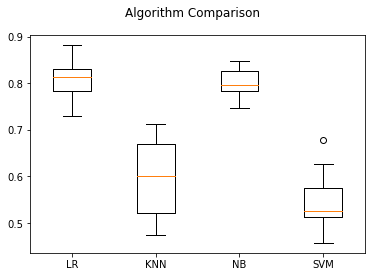

In [456]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

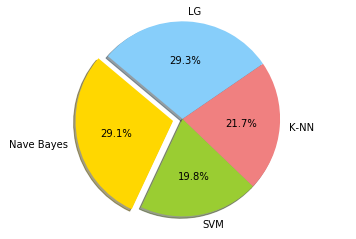

In [457]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Nave Bayes', 'SVM', 'K-NN', 'LG'
sizes = [80.14, 54.50, 59.77, 80.64]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

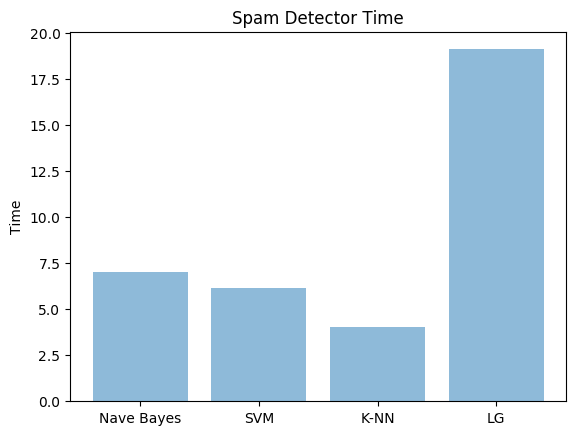

In [460]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Nave Bayes', 'SVM', 'K-NN', 'LG')
y_pos = np.arange(len(objects))
performance = [7.02,6.13,4.01,19.1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.title('Spam Detector Time')
 
plt.show()